In [1]:
import numpy as np

import pandas as pd
import pickle

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
parameters = {
    'vary_N': [(5000, 25, 0.01), (10000, 25, 0.01), (50000, 25, 0.01), (-1, 25, 0.01)], # -1 means the uksize
    'vary_M': [(-1, 5, 0.01), (-1, 10, 0.01), (-1, 25, 0.01), (-1, 50, 0.01), (-1, 100, 0.01)],
    'vary_h2': [(-1, 25, 0.001), (-1, 25, 0.005), (-1, 25, 0.01), (-1, 25, 0.05), (-1, 25, 0.1)], # control everyting else to be constant
    'vary_genes': [(-1, -1, 0.001), (-1, -1, 0.005), (-1, -1, 0.01), (-1, -1, 0.05), (-1, -1, 0.1)], # since M vary, so want to be more realistict
}

style='inter_excld'

# savePath="/home/boyang1995/research/QuadKAST/results/simulation/UKBB/"
savePath=f"/home/boyang1995/research/QuadKAST/results/simulation/UKBB/results_self_{style}/"
# savePath="/home/boyang1995/research/QuadKAST/results/simulation/UKBB/results_self_inter_excld/"
# params = pd.read_csv(f'{savePath}params.txt',sep=' ')


### vary N

Missing: vary_N_-1_25_0.01_1.pkl
Missing: vary_N_-1_25_0.01_2.pkl


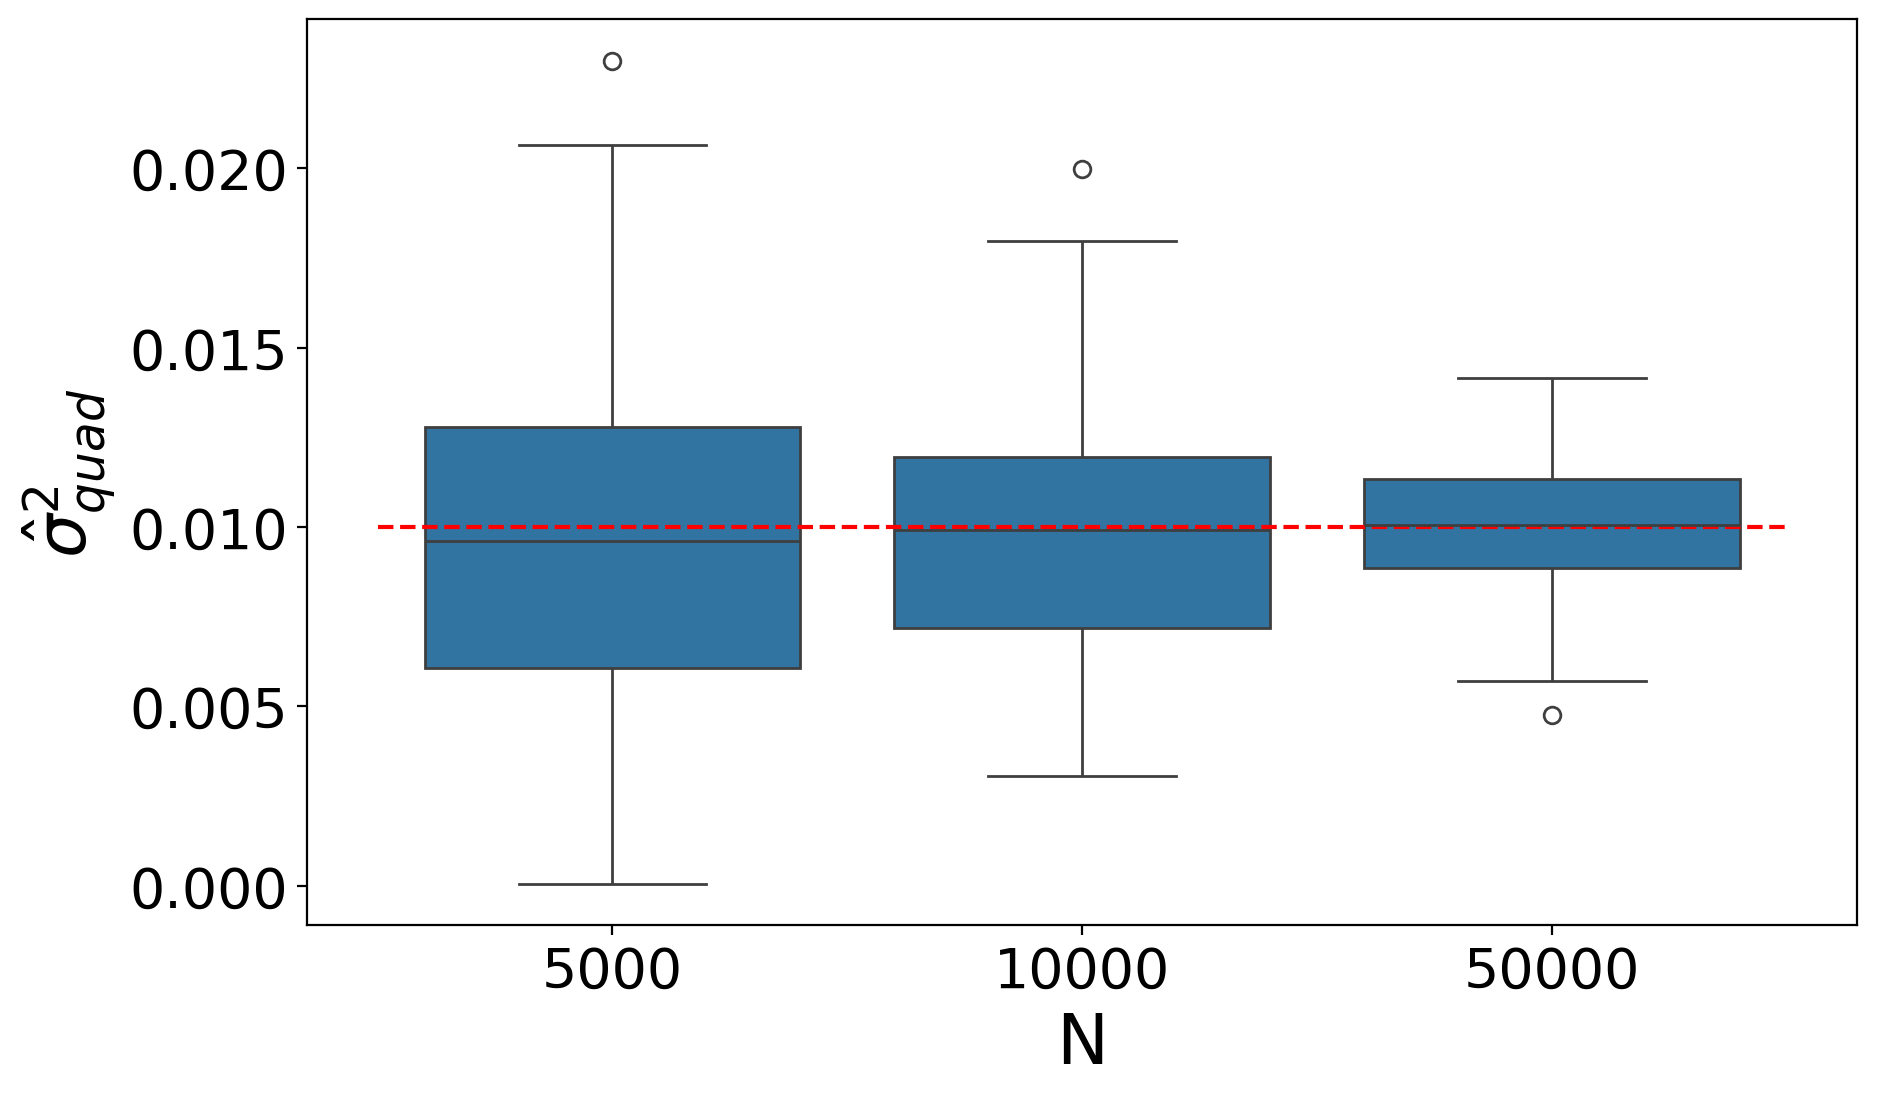

In [13]:
results = []
Task='vary_N'

params=parameters[Task]
for i in range(len(params)):
    for seed in range(1,3):
        N,M,sigma_g=params[i]
        N = int(N)
        M = int(M)
        try:
            with open(f'{savePath}{Task}_{N}_{M}_{sigma_g}_{seed}.pkl', 'rb') as handle:
                all_results=pickle.load(handle)
            for elem in all_results:
                if N==-1:
                    N=291273
                results.append([N,M,sigma_g,elem['varcomp'][0]])
        except:
            print(f'Missing: {Task}_{N}_{M}_{sigma_g}_{seed}.pkl')
results_df = pd.DataFrame(data=results,columns=['N','M','h2','h2_est'])
results_df.to_csv(f'var_comp/scale_N.{style}.csv',index=None)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
box_data = []
plt.figure(figsize=(10,6),dpi=200)
sns.boxplot(x="N", y="h2_est", data=results_df)
left, right = plt.xlim()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('N',fontsize=25)
plt.ylabel('$\hat{\sigma}^2_{quad}$',fontsize=25)
plt.hlines(sigma_g,left,right,linestyle='--',color='r')
# plt.legend(f'M={M}',fontsize=20)
# plt.title(f'h2={h2}',fontsize=25)
plt.show()

### Vary M

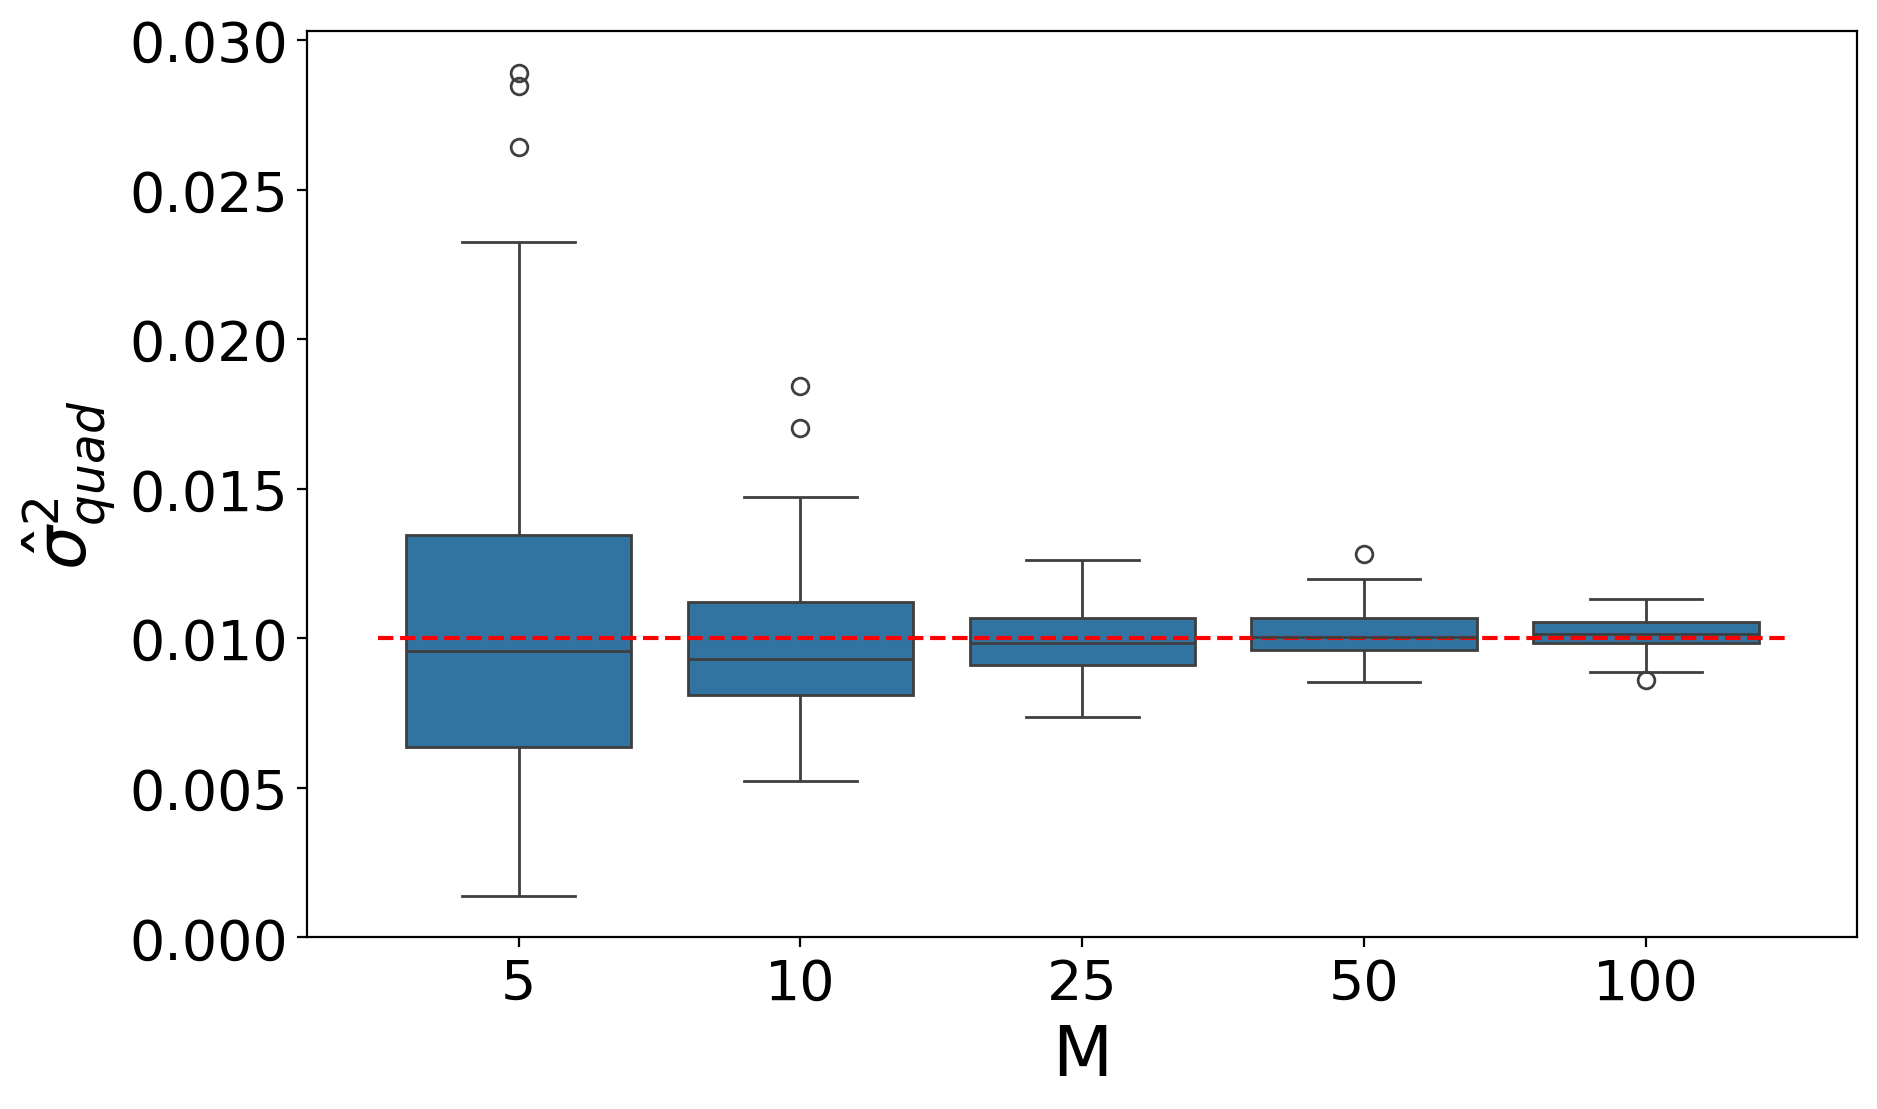

In [14]:
results = []
Task='vary_M'

params=parameters[Task]
for i in range(len(params)):
    for seed in range(1,3):
        N,M,sigma_g=params[i]
        N = int(N)
        M = int(M)
        try:
            with open(f'{savePath}{Task}_{N}_{M}_{sigma_g}_{seed}.pkl', 'rb') as handle:
                all_results=pickle.load(handle)
            for elem in all_results:
                results.append([N,M,sigma_g,elem['varcomp'][0]])
        except:
            print(f'Missing: {Task}_{N}_{M}_{sigma_g}_{seed}.pkl')
results_df = pd.DataFrame(data=results,columns=['N','M','h2','h2_est'])
results_df.to_csv(f'var_comp/scale_M.{style}.csv',index=None)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
box_data = []
plt.figure(figsize=(10,6),dpi=200)
sns.boxplot(x="M", y="h2_est", data=results_df)
left, right = plt.xlim()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('M',fontsize=25)
plt.ylabel('$\hat{\sigma}^2_{quad}$',fontsize=25)
plt.hlines(sigma_g,left,right,linestyle='--',color='r')
# plt.legend(f'M={M}',fontsize=20)
# plt.title(f'h2={h2}',fontsize=25)
plt.show()

### Vary genes

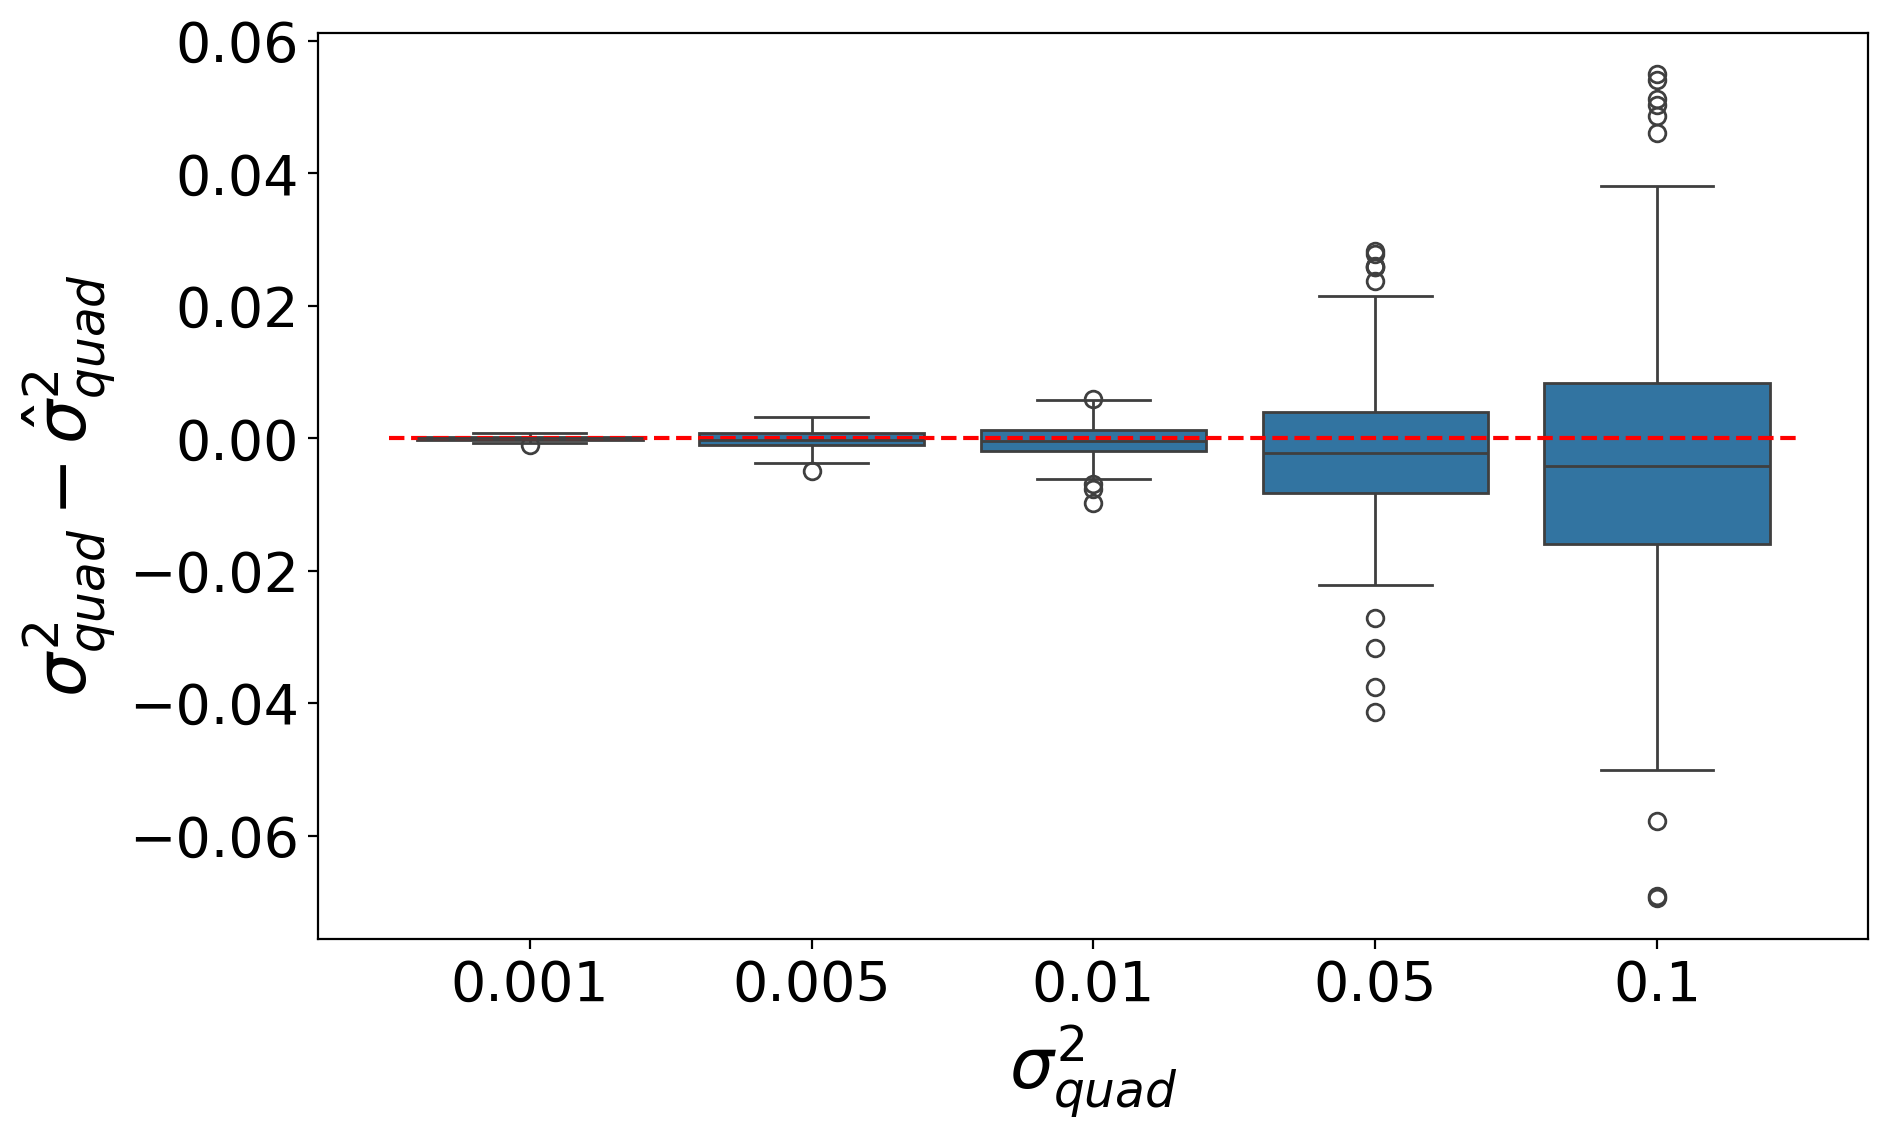

In [15]:
results = []
Task='vary_genes'

params=parameters[Task]
for i in range(len(params)):
    for seed in range(1,3):
        N,M,sigma_g=params[i]
        N = int(N)
        M = int(M)
        try:
            with open(f'{savePath}{Task}_{N}_{M}_{sigma_g}_{seed}.pkl', 'rb') as handle:
                all_results=pickle.load(handle)
            for elem in all_results:
                results.append([N,M,sigma_g,elem['varcomp'][0]])
        except:
            print(f'Missing: {Task}_{N}_{M}_{sigma_g}_{seed}.pkl')
results_df = pd.DataFrame(data=results,columns=['N','M','h2','h2_est'])
# results_df = results_df[results_df.h2<=0.01]
results_df['h2_diff']=results_df['h2']-results_df['h2_est']

results_df.to_csv(f'var_comp/scale_signal.{style}.csv',index=None)

box_data = []
plt.figure(figsize=(10,6),dpi=200)
sns.boxplot(x="h2", y="h2_diff", data=results_df)
left, right = plt.xlim()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\sigma_{quad}^2$',fontsize=25)
plt.ylabel('$\sigma_{quad}^2-\hat{\sigma}_{quad}^2$',fontsize=25)
plt.hlines(0,left,right,linestyle='--',color='r')
# plt.legend(f'M={M}',fontsize=20)
# plt.title(f'h2={h2}',fontsize=25)
plt.show()

### Vary genes relative error

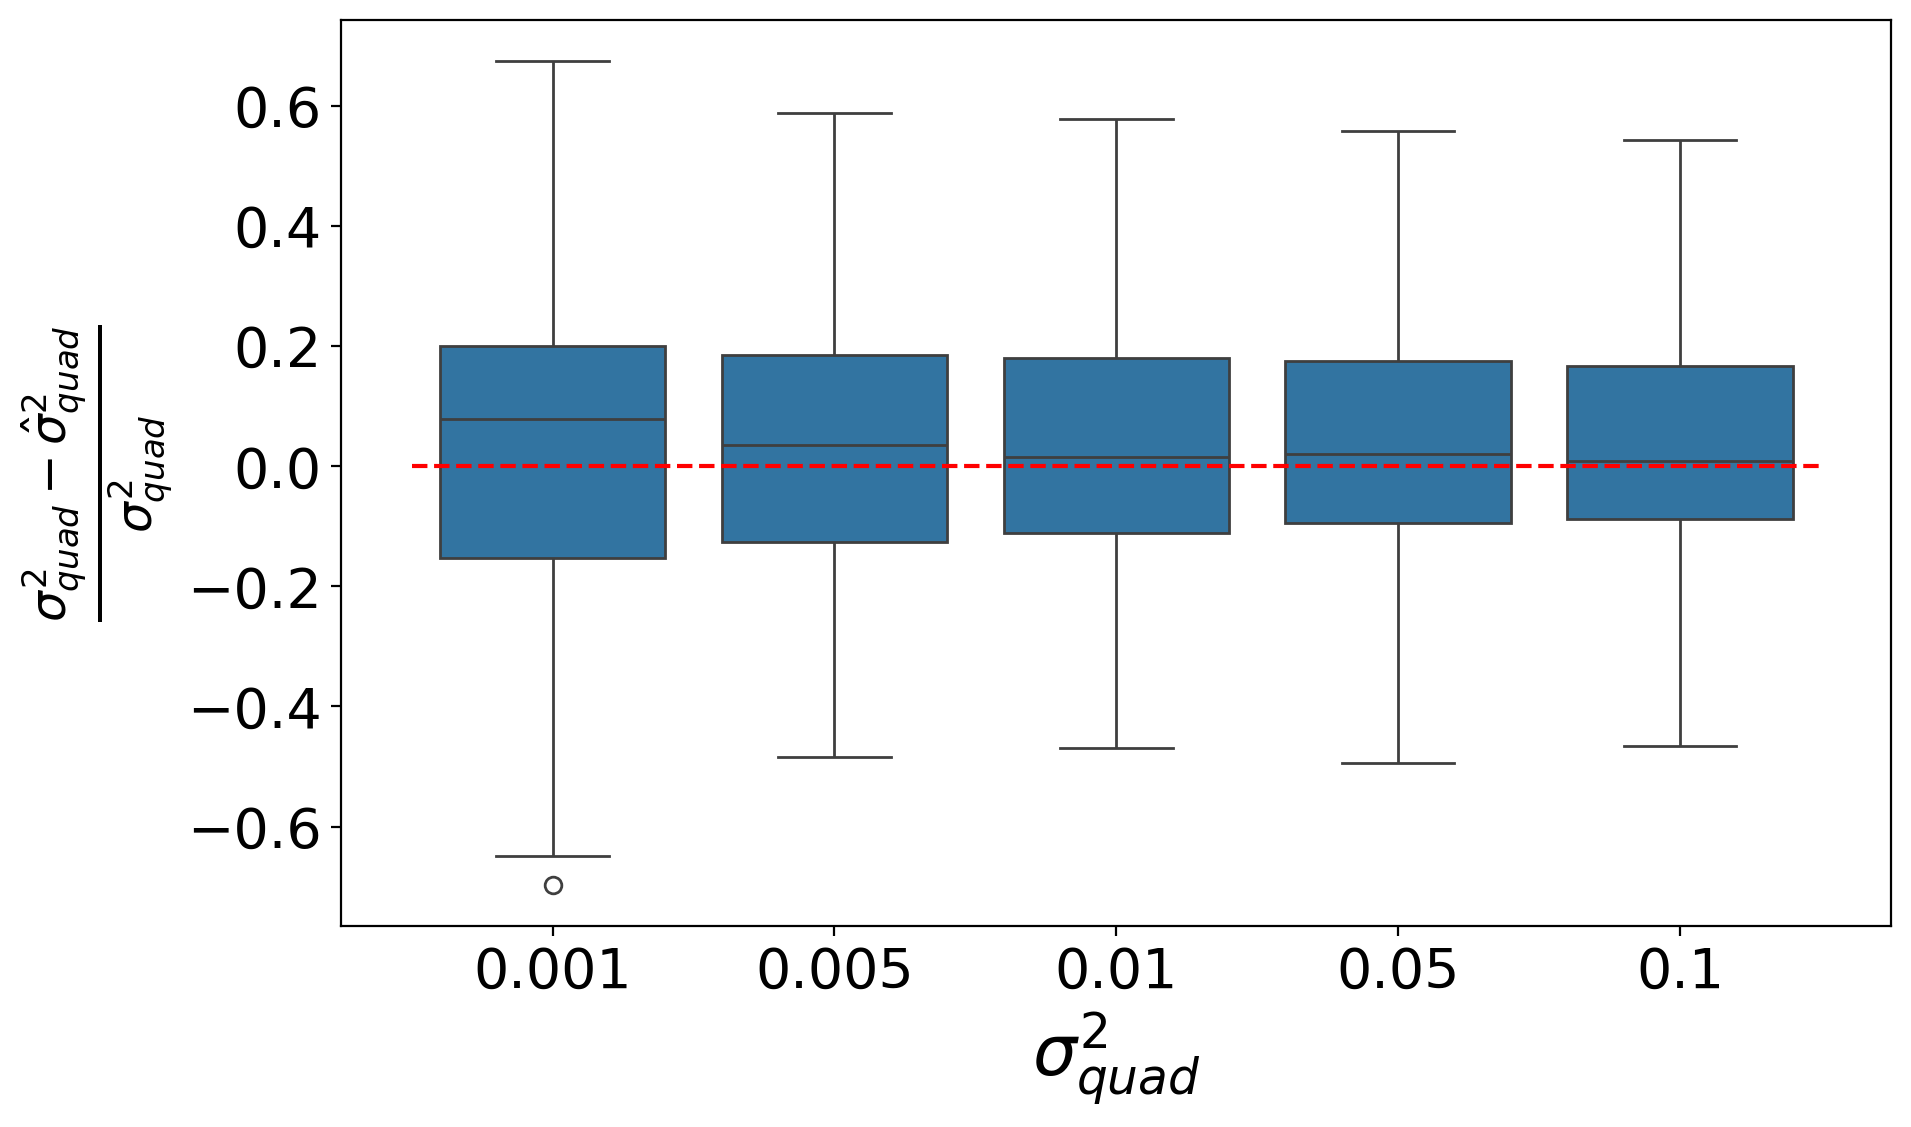

In [9]:
results = []
Task='vary_genes'

params=parameters[Task]
for i in range(len(params)):
    for seed in range(1,3):
        N,M,sigma_g=params[i]
        N = int(N)
        M = int(M)
        try:
            with open(f'{savePath}{Task}_{N}_{M}_{sigma_g}_{seed}.pkl', 'rb') as handle:
                all_results=pickle.load(handle)
            for elem in all_results:
                results.append([N,M,sigma_g,elem['varcomp'][0]])
        except:
            print(f'Missing: {Task}_{N}_{M}_{sigma_g}_{seed}.pkl')
results_df = pd.DataFrame(data=results,columns=['N','M','h2','h2_est'])
# results_df = results_df[results_df.h2<=0.01]
results_df['h2_diff']=(results_df['h2']-results_df['h2_est'])/results_df['h2']
results_df.to_csv('var_comp/scale_signal.inter_incld.csv',index=None)


box_data = []
plt.figure(figsize=(10,6),dpi=200)
sns.boxplot(x="h2", y="h2_diff", data=results_df)
left, right = plt.xlim()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\sigma_{quad}^2$',fontsize=25)
plt.ylabel('$\\frac{\sigma^2_{quad} - \hat{\sigma}^2_{quad}}{\sigma^2_{quad}}$',fontsize=25)
plt.hlines(0,left,right,linestyle='--',color='r')
# plt.legend(f'M={M}',fontsize=20)
# plt.title(f'h2={h2}',fontsize=25)
plt.show()

In [ ]:
results_df

In [ ]:
N = 5000
D = 50
M = 30
h2=0.1
results_sdf = results_df[(results_df.D==D)&(results_df.N==N)&(results_df.h2==h2)]
# results_sdf['h2_diff']=results_sdf['h2_est']-results_sdf['h2']
plt.figure(figsize=(10,6),dpi=200)
sns.boxplot(x="M", y="h2_est", hue="N", data=results_sdf)
left, right = plt.xlim()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('M',fontsize=25)
plt.ylabel('$\hat{h}^2$',fontsize=25)
plt.hlines(h2,left,right,linestyle='--',color='r')
plt.legend(fontsize=20)
# plt.title(f'h2={h2}',fontsize=25)
plt.show()

In [ ]:
results_df['h2_diff']